# BÀI TẬP PANDAS

## Đề Bài

Trên dữ liệu NYC:
- Bài 1:
    - Đếm số chuyến bay trễ của các sân bay (cột 'origin').
    - Tương tự, đếm số chuyến bay không trễ của các sân bay.
    - Tạo bảng hiển thị số chuyến bay trễ với không trễ.
    - Vẽ lên biểu đồ.
- Bài 2:
    - Thực hiện tương tự với các hãng hàng không (cột 'carrier').
- Bài 3:
    - Tính thời gian trễ (gồm 'dep_delay' và 'arr_delay') trung bình của các hãng.
    - Tính thời gian trễ (gồm 'dep_delay' và 'arr_delay') trung bình từ các sân bay.
    - Vẽ các kết quả lên biểu đồ.
- Bài 4:
    - Tính tổng, trung bình, mean, median của quãng đường bay của từng hãng (cột 'distance').

## Script

### Using

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Contract Fields

In [2]:
CN_MINUTE = 'minute'
CN_HOUR = 'hour'
CN_DAY = 'day'
CN_MONTH = 'month'
CN_YEAR = 'year'
CN_DEP_TIME = 'dep_time'
CN_DEP_DELAY = 'dep_delay'
CN_ARR_TIME = 'arr_time'
CN_ARR_DELAY = 'arr_delay'
CN_CARRIER = 'carrier'
CN_TAILNUM = 'tailnum'
CN_FLIGHT = 'flight'
CN_ORIGIN = 'origin'
CN_DEST = 'dest'
CN_AIR_TIME = 'air_time'
CN_DISTANCE = 'distance'

### Contract Methods

In [3]:
# Refactor
def refactor(s):
    return s.str.strip().str.upper()

In [4]:
# Try parse to int
def try_prs_int(s):
    return pd.to_numeric(s, errors='coerce').astype('Int64')

In [5]:
# Format header
def fmt_hdr(col_name):
    return col_name.replace('_', ' ').title()

In [6]:
# Format headers
def fmt_hdrs(cols):
    return cols.str.replace('_', ' ').str.title()

In [7]:
# Group count
def grp_cnt(df, grp_col_name, col_name):
    return df.groupby(grp_col_name)[col_name].count()

In [8]:
# Group mean
def grp_mean(df, grp_col_name, col_name_1, col_name_2):
    return df.groupby(grp_col_name)[[col_name_1, col_name_2]].mean().rename(columns={col_name_1: fmt_hdr(col_name_1), col_name_2: fmt_hdr(col_name_2)})

In [9]:
# Valid string series
def vld_str_ser(s):
    return s.notna() & ~s.eq('')

### Processing

In [10]:
df = pd.read_csv('nycflights.csv')

In [11]:
minute = try_prs_int(df[CN_MINUTE])
hour = try_prs_int(df[CN_HOUR])
day = try_prs_int(df[CN_DAY])
month = try_prs_int(df[CN_MONTH])
year = try_prs_int(df[CN_YEAR])
dep_time = try_prs_int(df[CN_DEP_TIME])
dep_delay = try_prs_int(df[CN_DEP_DELAY])
arr_time = try_prs_int(df[CN_ARR_TIME])
arr_delay = try_prs_int(df[CN_ARR_DELAY])
carrier = refactor(df[CN_CARRIER])
tailnum = refactor(df[CN_TAILNUM])
flight = try_prs_int(df[CN_FLIGHT])
origin = refactor(df[CN_ORIGIN])
dest = refactor(df[CN_DEST])
air_time = try_prs_int(df[CN_AIR_TIME])
distance = try_prs_int(df[CN_DISTANCE])

In [12]:
# Request 1
df1 = df.loc[(dep_delay.notna() & vld_str_ser(origin))]

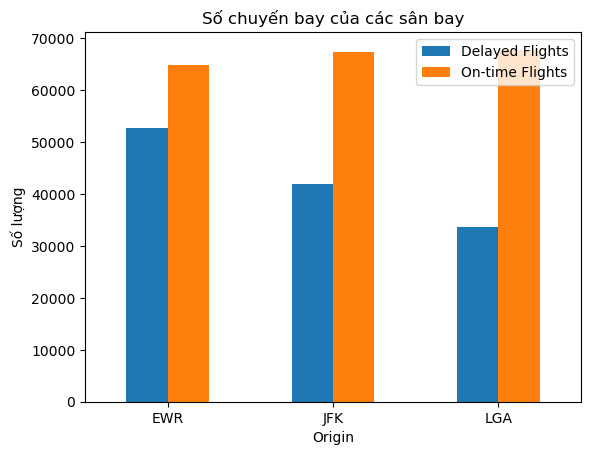

In [13]:
# Request 1.1
flight_delays = pd.DataFrame({
    'Delayed Flights': grp_cnt(df1[df1[CN_DEP_DELAY] > 0], CN_ORIGIN, CN_DEP_DELAY),
    'On-time Flights': grp_cnt(df1[df1[CN_DEP_DELAY] <= 0], CN_ORIGIN, CN_DEP_DELAY)
})
flight_delays.index.name = fmt_hdr(CN_ORIGIN)
flight_delays.plot.bar(rot=0)
plt.ylabel('Số lượng')
plt.title('Số chuyến bay của các sân bay')
plt.show()

In [14]:
# Request 1.2
board1 = flight_delays.reset_index()
board1.columns = fmt_hdrs(board1.columns)
print(board1)

  Origin  Delayed Flights  On-Time Flights
0    EWR            52711            64885
1    JFK            42031            67385
2    LGA            33690            67819


In [15]:
# Request 2
df2 = df.loc[(dep_delay.notna() & vld_str_ser(carrier))]

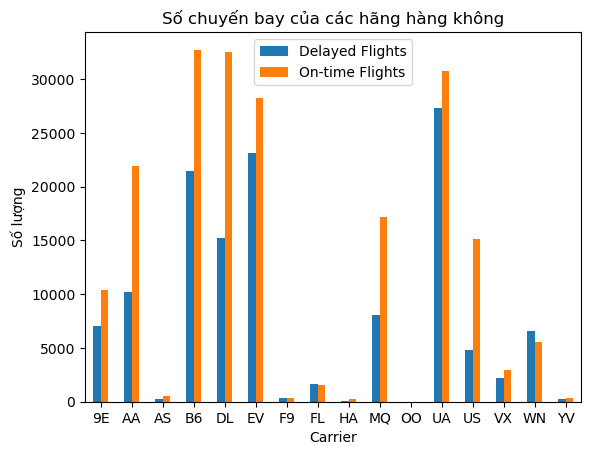

In [16]:
# Request 2.1
carrier_delays = pd.DataFrame({
    'Delayed Flights': grp_cnt(df2[df2[CN_DEP_DELAY] > 0], CN_CARRIER, CN_DEP_DELAY),
    'On-time Flights': grp_cnt(df2[df2[CN_DEP_DELAY] <= 0], CN_CARRIER, CN_DEP_DELAY)
})
carrier_delays.index.name = fmt_hdr(CN_CARRIER)
carrier_delays.plot.bar(rot=0)
plt.ylabel('Số lượng')
plt.title('Số chuyến bay của các hãng hàng không')
plt.show()

In [17]:
# Request 2.2
board2 = carrier_delays.reset_index()
board2.columns = fmt_hdrs(board2.columns)
print(board2)

   Carrier  Delayed Flights  On-Time Flights
0       9E             7063            10353
1       AA            10162            21931
2       AS              226              486
3       B6            21445            32724
4       DL            15241            32520
5       EV            23139            28217
6       F9              341              341
7       FL             1654             1533
8       HA               69              273
9       MQ             8031            17132
10      OO                9               20
11      UA            27261            30718
12      US             4775            15098
13      VX             2225             2906
14      WN             6558             5525
15      YV              233              312


In [18]:
# Request 3
df3 = df.loc[(dep_delay.notna() & arr_delay.notna() & vld_str_ser(origin) & vld_str_ser(carrier))]

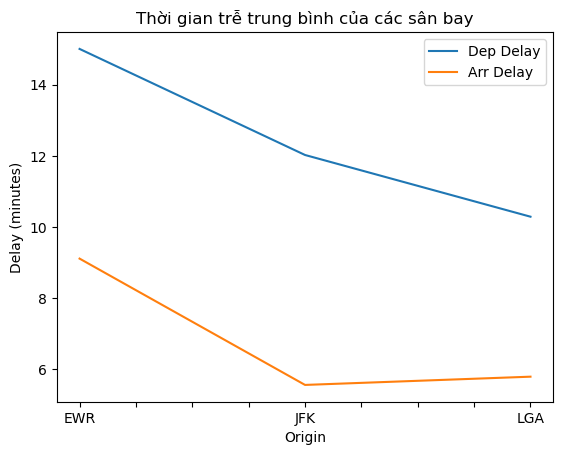

In [19]:
# Request 3.1
mean_delays_origin = grp_mean(df3, CN_ORIGIN, CN_DEP_DELAY, CN_ARR_DELAY)
mean_delays_origin.index.name = fmt_hdr(CN_ORIGIN)
mean_delays_origin.plot(rot=0)
plt.ylabel('Delay (minutes)')
plt.title('Thời gian trễ trung bình của các sân bay')
plt.show()

In [20]:
# Request 3.2
print(mean_delays_origin.reset_index())

  Origin  Dep Delay  Arr Delay
0    EWR  15.009110   9.107055
1    JFK  12.023607   5.551481
2    LGA  10.286583   5.783488


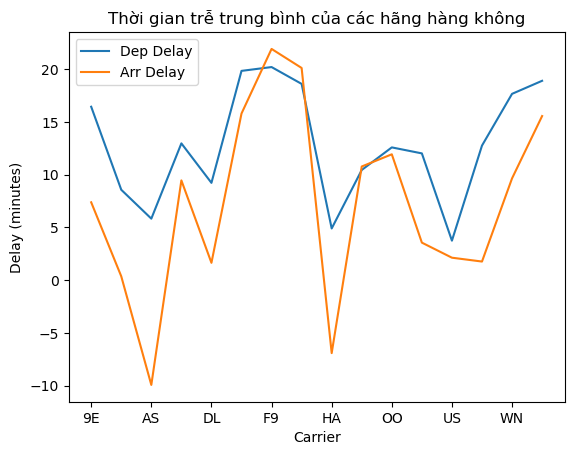

In [21]:
# Request 3.3
mean_delays_carrier = grp_mean(df3, CN_CARRIER, CN_DEP_DELAY, CN_ARR_DELAY)
mean_delays_carrier.index.name = fmt_hdr(CN_CARRIER)
mean_delays_carrier.plot(rot=0)
plt.ylabel('Delay (minutes)')
plt.title('Thời gian trễ trung bình của các hãng hàng không')
plt.show()

In [22]:
# Request 3.4
print(mean_delays_carrier.reset_index())

   Carrier  Dep Delay  Arr Delay
0       9E  16.439574   7.379669
1       AA   8.569130   0.364291
2       AS   5.830748  -9.930889
3       B6  12.967548   9.457973
4       DL   9.223950   1.644341
5       EV  19.838929  15.796431
6       F9  20.201175  21.920705
7       FL  18.605984  20.115906
8       HA   4.900585  -6.915205
9       MQ  10.445381  10.774733
10      OO  12.586207  11.931034
11      UA  12.016908   3.558011
12      US   3.744693   2.129595
13      VX  12.756646   1.764464
14      WN  17.661657   9.649120
15      YV  18.898897  15.556985


In [23]:
# Request 4
df4 = df.loc[(distance.notna() & distance > 0 & vld_str_ser(carrier))]

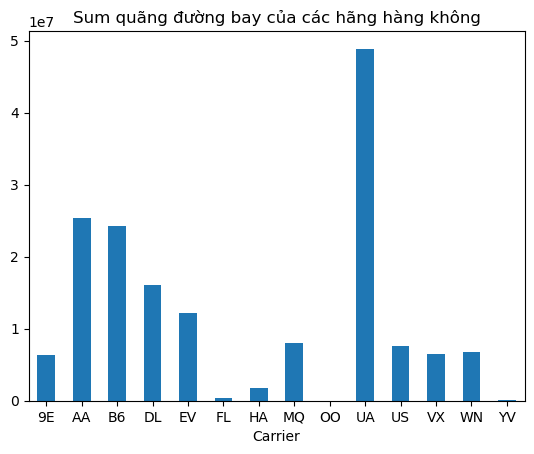

In [24]:
# Request 4.1
total_distance = df4.groupby(CN_CARRIER)[CN_DISTANCE].sum()
total_distance.index.name = fmt_hdr(CN_CARRIER)
total_distance.plot.bar(rot=0)
plt.title('Sum quãng đường bay của các hãng hàng không')
plt.show()

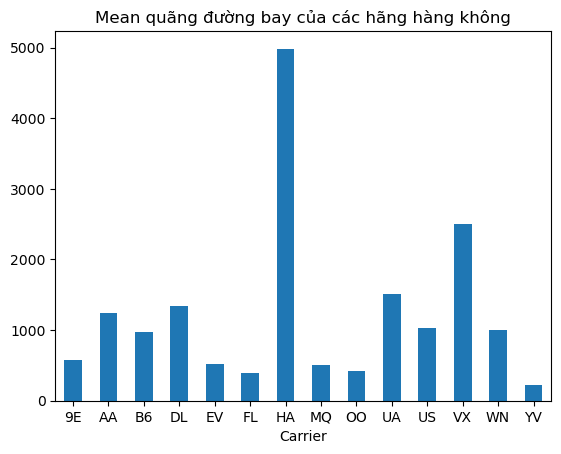

In [25]:
# Request 4.2
mean_distance = df4.groupby(CN_CARRIER)[CN_DISTANCE].mean()
mean_distance.index.name = fmt_hdr(CN_CARRIER)
mean_distance.plot.bar(rot=0)
plt.title('Mean quãng đường bay của các hãng hàng không')
plt.show()

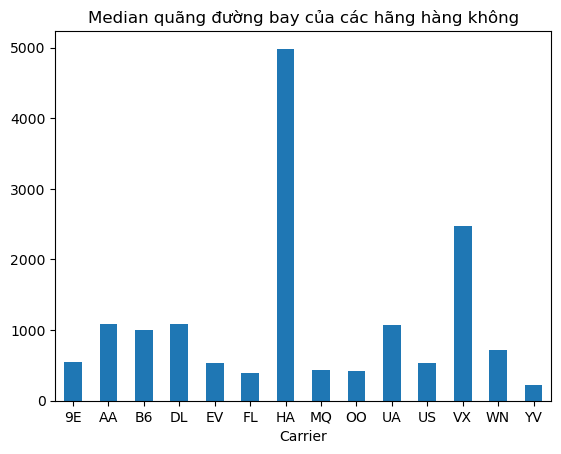

In [26]:
# Request 4.3
median_distance = df4.groupby(CN_CARRIER)[CN_DISTANCE].median()
median_distance.index.name = fmt_hdr(CN_CARRIER)
median_distance.plot.bar(rot=0)
plt.title('Median quãng đường bay của các hãng hàng không')
plt.show()